# Lab - Regularization

## Week 4 Monday 11th January

In [3]:
## TASK: Regularized regression
## FUNCTIONS: Ridge, RidgeCV, Lasso, LassoCV
## DOCUMENTATION: http://scikit-learn.org/stable/modules/linear_model.html
## DATA: Crime (n=319 non-null, p=122, type=regression)
## DATA DICTIONARY: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

## This data set contains data on violent crimes within a community.

########## Prepare data ##########
# read in data, remove categorical features, remove rows with missing values
import pandas as pd
crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None, na_values=['?'])
crime = crime.iloc[:, 5:]
crime.dropna(inplace=True)
crime.head()

# define X and y
X = crime.iloc[:, :-1]
y = crime.iloc[:, -1]

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
# How many columns are in X? 126

In [6]:
########## Linear Regression Model Without Regularization ##########
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_
# What are these numbers? Coefficients of the X variables

array([ -3.66188167e+00,   6.98124465e-01,  -2.61955467e-01,
        -2.85270027e-01,  -1.64740837e-01,   2.46972333e-01,
        -1.09290051e+00,  -5.96857796e-01,   1.11200239e+00,
        -7.21968931e-01,   4.27346598e+00,  -2.28040268e-01,
         8.04875769e-01,  -2.57934732e-01,  -2.63458023e-01,
        -1.04616958e+00,   6.07784197e-01,   7.73552561e-01,
         5.96468029e-02,   6.90215922e-01,   2.16759430e-02,
        -4.87802949e-01,  -5.18858404e-01,   1.39478815e-01,
        -1.24417942e-01,   3.15003821e-01,  -1.52633736e-01,
        -9.65003927e-01,   1.17142163e+00,  -3.08546690e-02,
        -9.29085548e-01,   1.24654586e-01,   1.98104506e-01,
         7.30804821e-01,  -1.77337294e-01,   8.32927588e-02,
         3.46045601e-01,   5.01837338e-01,   1.57062958e+00,
        -4.13478807e-01,   1.39350802e+00,  -3.49428114e+00,
         7.09577818e-01,  -8.32141352e-01,  -1.39984927e+00,
         1.02482840e+00,   2.13855006e-01,  -6.18937325e-01,
         5.28954490e-01,

In [7]:
# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print 'RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (no regularization) = 0.233813676495


In [12]:
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
print rreg.coef_
preds = rreg.predict(X_test)
print 'RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
# Is this model better? Why? Yes because it MSE is smaller

[ -4.00298418e-03   3.51647445e-02   6.03535935e-02  -7.68532502e-02
  -1.76099849e-02   4.53791433e-02   8.81586468e-03  -2.88885814e-02
  -1.92143587e-02   3.36122201e-02   5.71590736e-04  -4.85438136e-02
   5.55725157e-02  -1.15934270e-01  -1.11880845e-01  -3.32742094e-01
  -1.12302031e-02   9.63833243e-02  -8.92057732e-02   8.42691702e-02
  -1.67246717e-02   7.42520308e-03  -1.21294025e-01  -6.70155789e-02
  -1.74250249e-03   1.69446833e-01   3.18217654e-02  -1.00209834e-01
   3.97535644e-02  -1.19173054e-01  -1.04445267e-01  -5.14946676e-03
   1.10071013e-01  -3.22958955e-02  -1.40601627e-01   7.72658029e-02
   9.07962536e-02  -3.78878862e-03   4.61941793e-02   6.30299731e-02
  -3.09236932e-02   1.02883578e-02   9.70425568e-02  -1.28936944e-01
  -1.38268907e-01  -6.37169778e-02  -8.80160419e-02  -4.01991014e-02
   8.11064596e-02  -6.30663975e-02   1.29756859e-01  -6.25210624e-02
   1.60531213e-02  -1.39061824e-01   6.39822353e-02   4.87118744e-02
  -7.68217532e-03  -1.53523412e-03

In [16]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
print rregcv.coef_
print 'RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
# What is the range of alp vlues we are searching over? -2 to 3

[ -1.35479199e-03   3.66493623e-03   5.67246153e-02  -6.65596102e-02
   7.50154730e-03   3.73570277e-03   1.48458510e-02  -8.26212596e-03
  -9.14751985e-04   8.17782143e-03  -9.58221848e-04   3.99333039e-03
  -2.04774531e-02  -3.80310378e-02  -7.06311041e-02  -9.07995340e-02
   3.92365601e-03   3.68491166e-02  -2.35269424e-02  -1.36618143e-02
  -9.83437557e-03   1.30086791e-02  -3.43297706e-02  -5.04638755e-02
  -9.82883411e-04   7.47392898e-02   2.63572032e-02  -1.07987605e-02
   3.16035521e-02  -2.17283831e-02  -4.45588182e-03  -1.06490401e-02
   4.42829964e-02  -3.72944143e-02  -6.18713730e-02   3.20124805e-02
   5.85549588e-03  -1.23569409e-02   6.53560040e-02   3.46461301e-02
   6.00524147e-02   6.39805254e-02   2.58651194e-02  -6.73126020e-02
  -7.02669216e-02  -5.05555985e-02  -6.41318316e-02   8.24959798e-03
   9.27945661e-03   2.77399795e-03   5.26650167e-02  -3.83854430e-03
  -6.04984296e-03  -1.53114959e-02   1.72393078e-02   2.11864055e-02
   4.40697120e-04   3.32044620e-03

In [18]:
########## Lasso Regression Model ##########
# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
print las.coef_
preds = las.predict(X_test)
print 'RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

[ 0.          0.          0.         -0.03974695  0.          0.          0.
  0.          0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.27503063 -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.          0.

In [20]:
# try a smaller alpha
las = Lasso(alpha=0.0001, normalize=True)
las.fit(X_train, y_train)
print las.coef_
preds = las.predict(X_test)
print 'RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))


[ 0.          0.          0.         -0.00418625 -0.          0.09573169
 -0.         -0.         -0.          0.          0.         -0.0308013   0.
 -0.09352469 -0.08937229 -0.58628915  0.          0.16706299 -0.06130851
  0.11966402 -0.         -0.         -0.10046533 -0.01816658 -0.
  0.19148624  0.0281072  -0.21042443  0.         -0.06733447 -0.30656472
  0.          0.12856465 -0.         -0.18235778  0.05534065  0.14885766
  0.          0.          0.         -0.07395512 -0.          0.16423116
 -0.         -0.3780258  -0.         -0.         -0.          0.03341259
 -0.          0.22040155 -0.02724104  0.         -0.10195256  0.06214765
  0.0274531   0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.2690561   0.          0.
  0.35611039  0.04332233  0.04845138  0.0257534   0.12236177 -0.00563988
  0.          0.          0.         -0.         -0.         -0.0261296  -0.
 -0.36526572  0.          0.          0.389

In [22]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print lascv.alpha_
print lascv.coef_
preds = lascv.predict(X_test)
print 'RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

0.01
[ 0.          0.          0.         -0.03974695  0.          0.          0.
  0.          0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.27503063 -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.       

### Lookup [Elastic Net](http://scikit-learn.org/stable/modules/linear_model.html#elastic-net) and complete the following.



1. What is elastic net?
2. How does it work?
3. Run elastic net on the above dataset

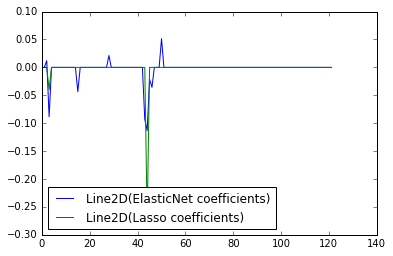

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import ElasticNet
#ElasticNet fitting
enet = ElasticNet(alpha=0.01, l1_ratio=0.7,normalize=True)
#higher the l1_ratio, the more it becomes like Lasso
model_enet = enet.fit(X_train, y_train)

#just lasso fitting
lasso = Lasso(alpha=0.01, normalize=True)
model_lasso = lasso.fit(X_train, y_train)

#print model_enet.coef_
l1 = plt.plot(enet.coef_, label='ElasticNet coefficients')
#print model_lasso.coef_
l2 = plt.plot(lasso.coef_, label='Lasso coefficients')
plt.legend((l1[-1], l2[-1]),loc='lower left')